# ML - Fall 2023 - Practical Homework

## Practical Homework 6 - KMeans and PCA

Student Name:

Student Number:

# Phase 0: Introduction

**In this assignment, you will develop K-means and PCA algorithm to perform data segmentation. The dataset contains behavioral variables of customers such as Balance, Purchases, etc. Your task is to make a model to segment the same customers into the clusters.**

In [150]:
# essential packages 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore") 

# add any other packages that you may need here

In [151]:
!wget -O https://www.dropbox.com/scl/fi/vcejtazdshv8dnhbnfxc7/dataset.csv?rlkey=zauavuzjf5jzmdoqtorkmrkzk&dl=1

# Phase 1: Explore

## Sec 1: Load and Explore the given dataset (P1-Sec1: 25 Points)

Load the dataset and display the first 10 rows of dataset. **(P1-1-1: 2 points)**

In [152]:
df = pd.read_csv('/kaggle/input/market-segmentation-in-insurance-unsupervised/Customer Data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Print the column names and number of data samples. **(P1-1-2: 1 points)**

In [153]:
df.info()
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Identify the columns that contain nan values. **(P1-1-3: 2 points)**

In [154]:
nan_columns = df.columns[df.isnull().any()]
nan_columns

Index(['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'], dtype='object')

Fill the nan values with the median of each column. **(P1-1-4: 2 points)**

In [155]:
fill_values = {col: df[col].median() for col in nan_columns}
df_filled = df.fillna(value=fill_values)
filled_nan = df_filled.columns[df_filled.isnull().any()]
filled_nan

Index([], dtype='object')

Find the max, min, and average of each column with numerical data. **(P1-1-5: 2 points)**

In [156]:
df_filled.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Plot the Histogram of each column with numerical data. Also, show the median and average value of each column in plot. **(P1-1-6: 6 points)**

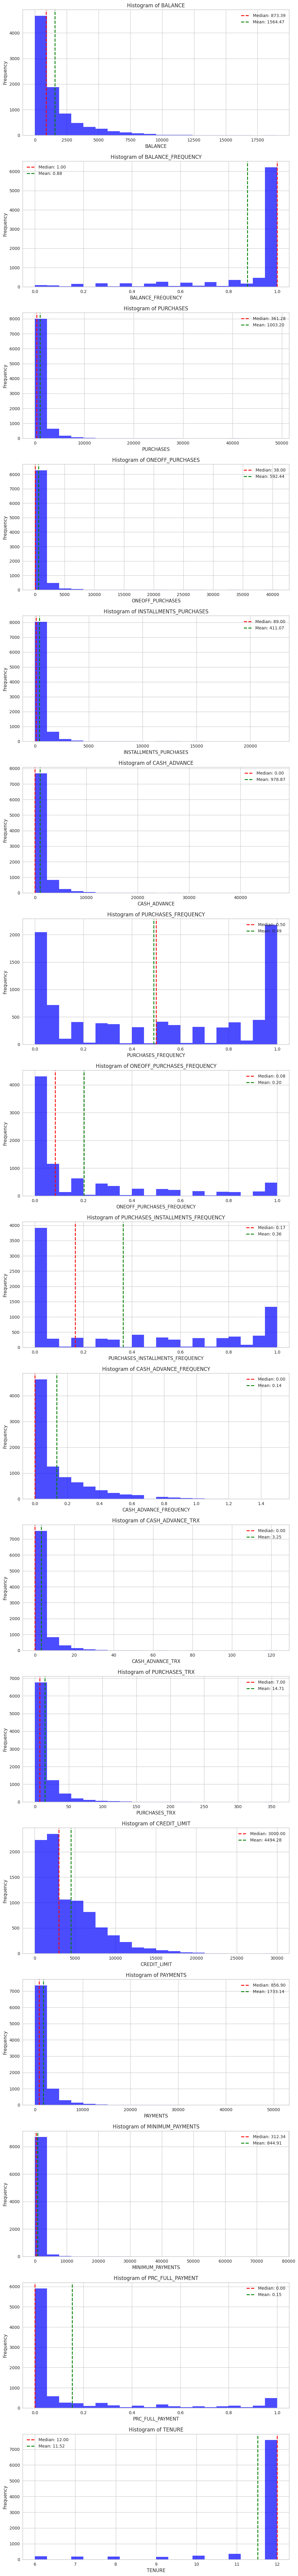

In [157]:
numeric_columns =df_filled.select_dtypes(include='number')


fig, axes = plt.subplots(nrows=len(numeric_columns.columns), ncols=1, figsize=(10, 5 * len(numeric_columns.columns)))

for i, column in enumerate(numeric_columns.columns):
    ax = axes[i]
    ax.hist(numeric_columns[column], bins=20, color='blue', alpha=0.7)
    
    median_val = numeric_columns[column].median()
    mean_val = numeric_columns[column].mean()
    ax.axvline(median_val, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
    ax.axvline(mean_val, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

Display the box plot for each numerical column. **(P1-1-7: 5 points)**

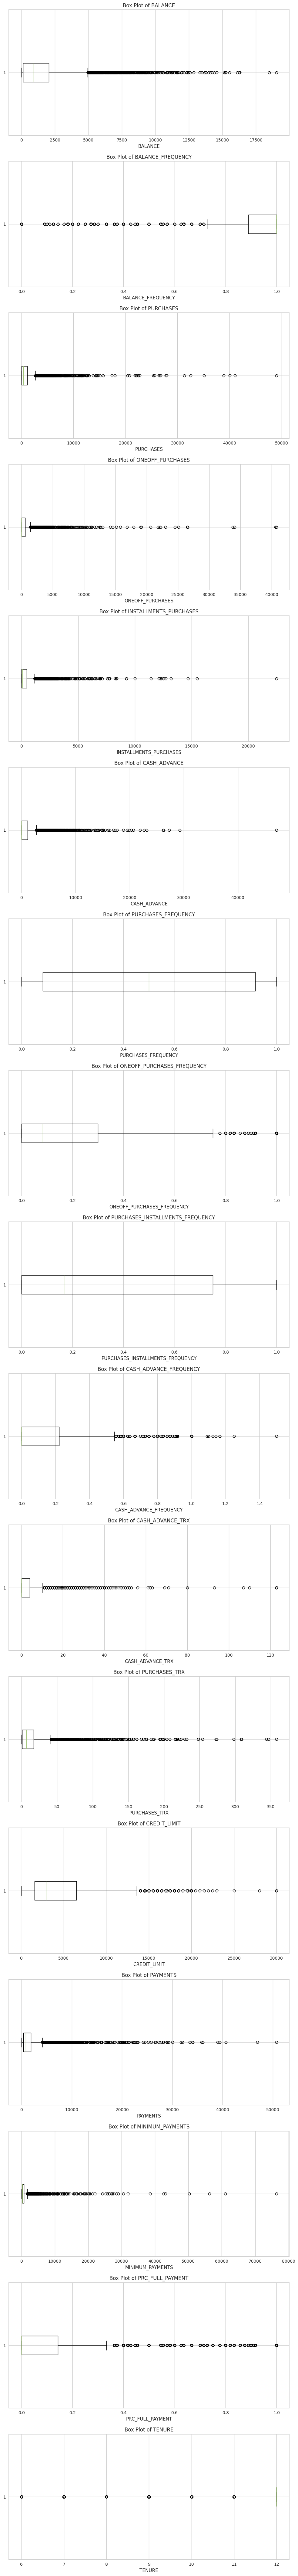

In [158]:
fig, axes = plt.subplots(nrows=len(numeric_columns.columns), ncols=1, figsize=(10, 5 * len(numeric_columns.columns)))
for i, column in enumerate(numeric_columns.columns):
    ax = axes[i]
    ax.boxplot(numeric_columns[column], vert=False)
    
    ax.set_title(f'Box Plot of {column}')
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

Show the correlation between columns by plotting the heatmap of correlation coefficients. **(P1-1-8: 5 points)**

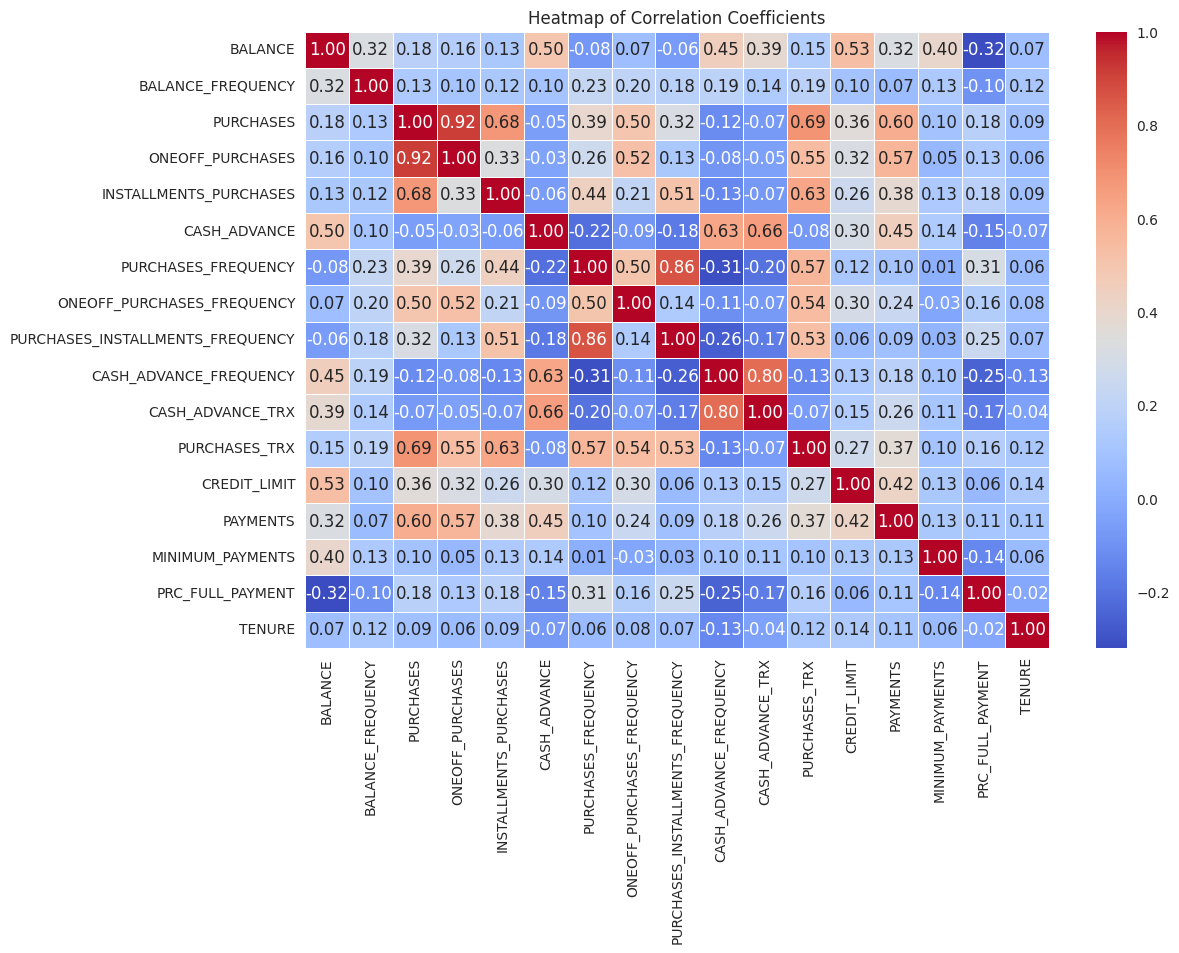

In [159]:
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Coefficients')
plt.show()

# Phase 2: Preprocessing

## Sec 1: Preprocess the data **(P2-Sec1: 15 Points)**

drop the 'CUST_ID' column. **(P2-1-1: 2 points)**

In [160]:
df_filled = df_filled.drop(['CUST_ID'], axis = 1)
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Check for duplicated rows. If there is any duplicated row, remove them. **(P2-1-2: 6 points)**

In [161]:
duplicated_rows = df_filled.duplicated()

print("Duplicated Rows:")
print(df_filled[duplicated_rows])

df_filled = df_filled.drop_duplicates()

Duplicated Rows:
Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []


Normalize the values of each column. **(P2-1-3: 7 points)**

In [162]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numeric_columns = df_filled.select_dtypes(include='number')
ss = StandardScaler()
data = pd.DataFrame(ss.fit_transform(numeric_columns), columns=numeric_columns.columns)

data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


# Phase 3: Modeling

## Sec 1: PCA and K-means with sklearn **(P3-Sec1: 40 Points)**

Use the `PCA` class from the `sklearn` library to reduce the dimensionality of the DataFrame. **(P3-1-1: 2 points)**

Follow [this link](https://www.youtube.com/watch?v=nEvKduLXFvk) to understand more about PCA (2 minutes).

In [163]:
pca = PCA(n_components=4)

pca_res = pca.fit_transform(data)
pca_df = pd.DataFrame(data=pca_res, columns=[f'PC{i+1}' for i in range(4)])
pca_df

,PC1,PC2,PC3,PC4
0,-1.683649,-1.072241,0.475658,0.679828
1,-1.134084,2.509148,0.602226,-0.109116
2,0.969395,-0.383576,0.090967,1.238257
3,-0.888220,0.004648,1.499803,1.075373
4,-1.600021,-0.683794,0.347922,1.013428
...,...,...,...,...
8945,-0.362572,-2.013435,-0.975617,-2.742774
8946,-0.580811,-1.675662,-1.222362,-1.980876
8947,-0.928986,-1.808047,-0.458250,-2.296655
8948,-2.337845,-0.653610,0.982826,-1.847934


**Elbow Method Visualization** helps to determine the optimal number of clusters by visualizing the within-cluster sum of squares (WCSS) against the number of clusters.

Use the `plot_elbow_method function` to plot the number of clusters versus WCSS for both the main DataFrame and the one reduced using `PCA`. Then Discuss the choice of the number of components for PCA and clusters for K-means. **(P3-1-2: 10 points)**

In [164]:
def plot_elbow_method(X, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    plt.plot(range(1, max_clusters + 1), wcss, marker = 'o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    for i, num_components in enumerate(range(max_clusters)):
        plt.hlines(wcss[i], xmin=1, xmax=max_clusters, colors='r', linestyles='dashed', lw=2)
    plt.show()

PCA  1


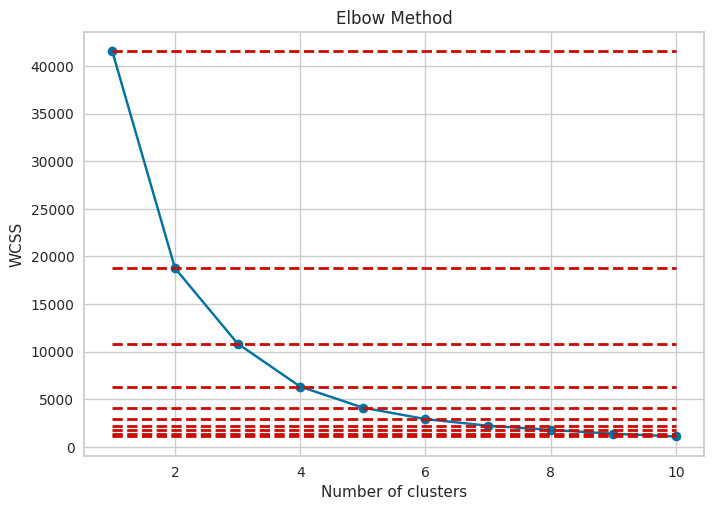

PCA  2


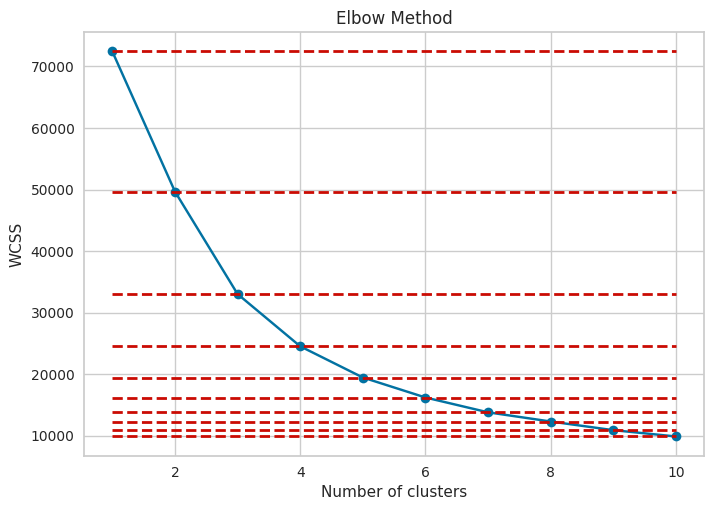

PCA  3


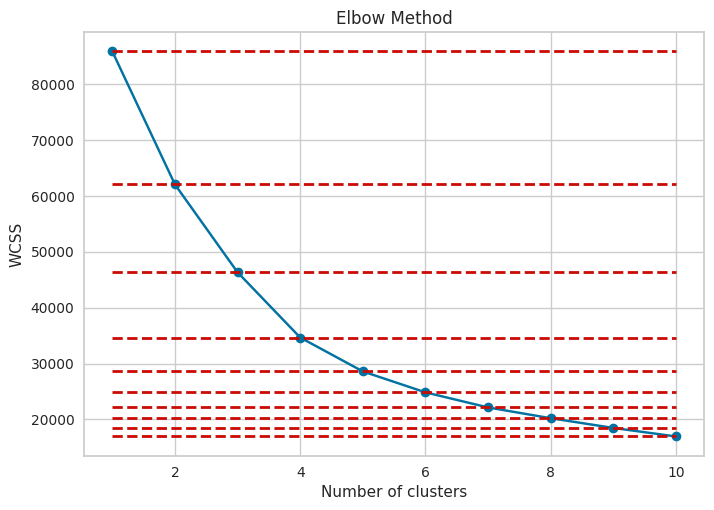

PCA  4


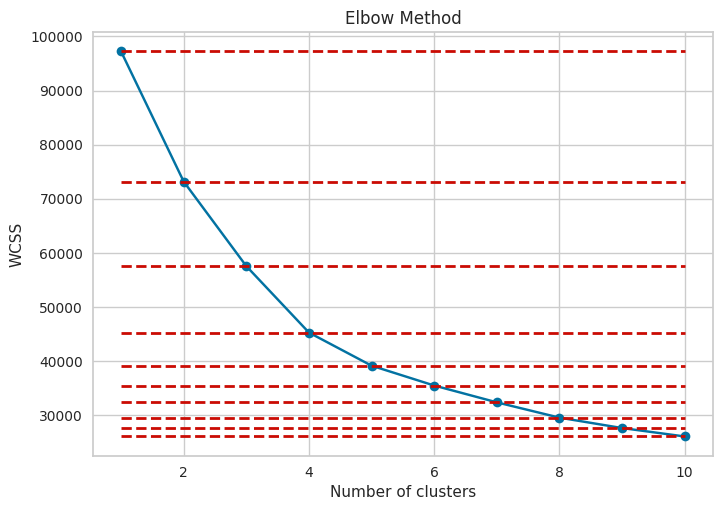

PCA  5


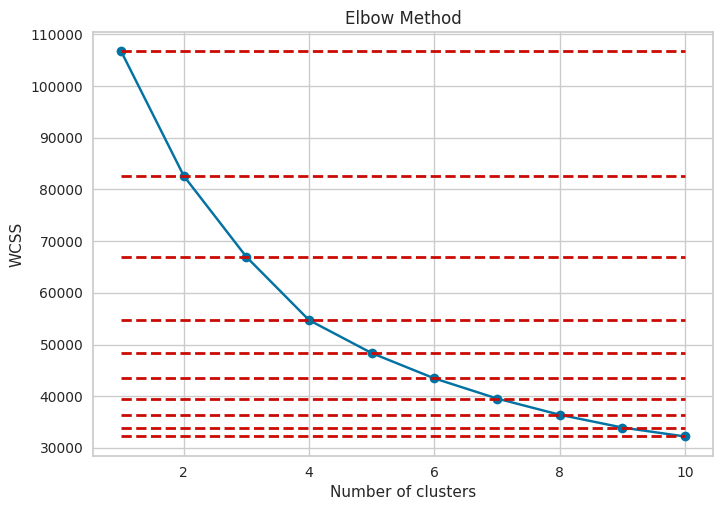

PCA  6


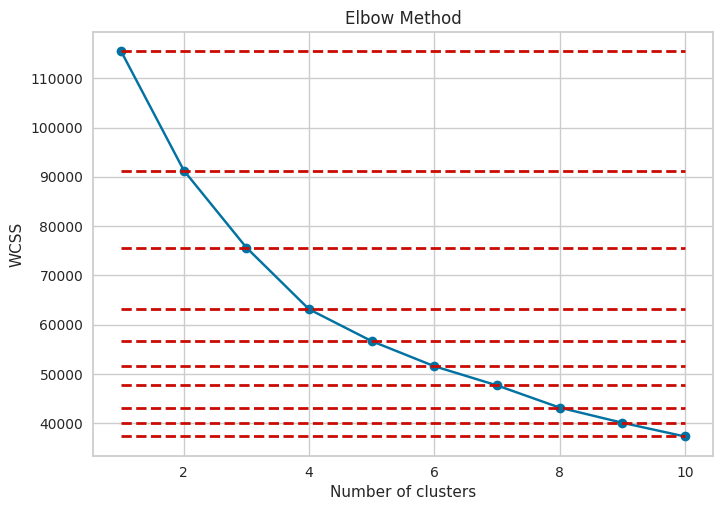

PCA  7


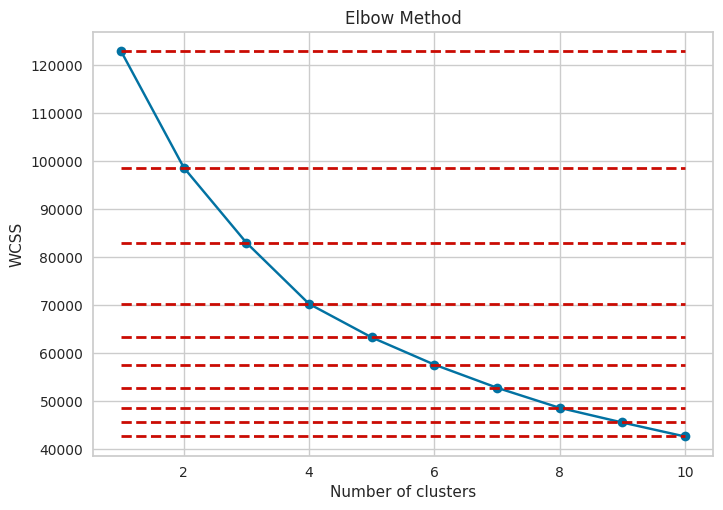

PCA  8


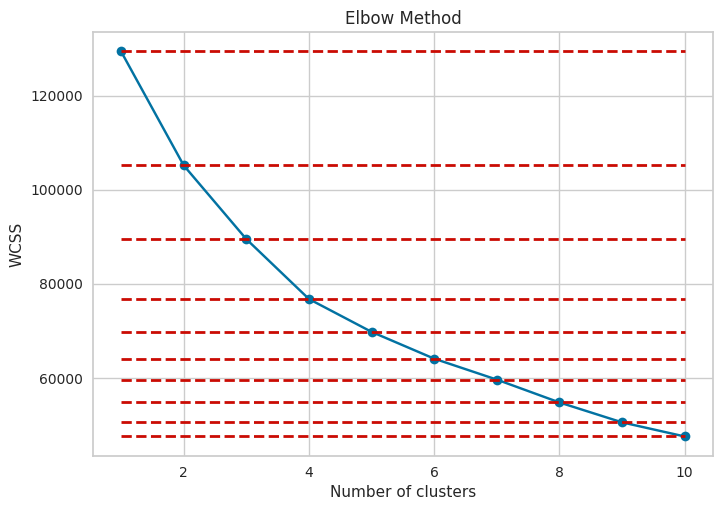

PCA  9


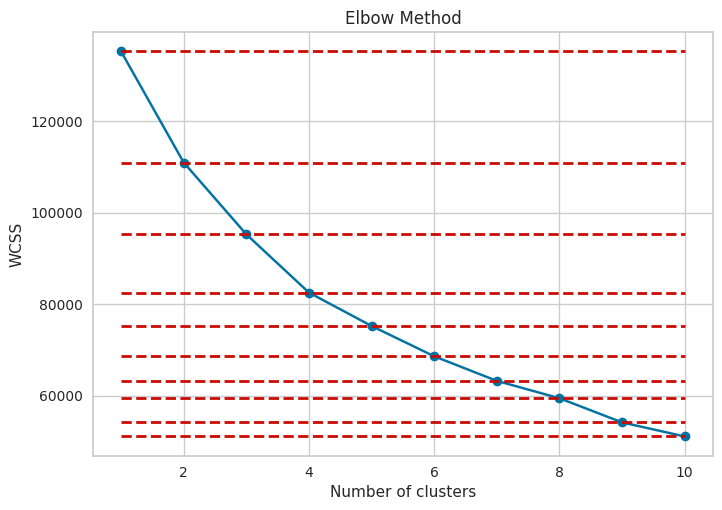

PCA  10


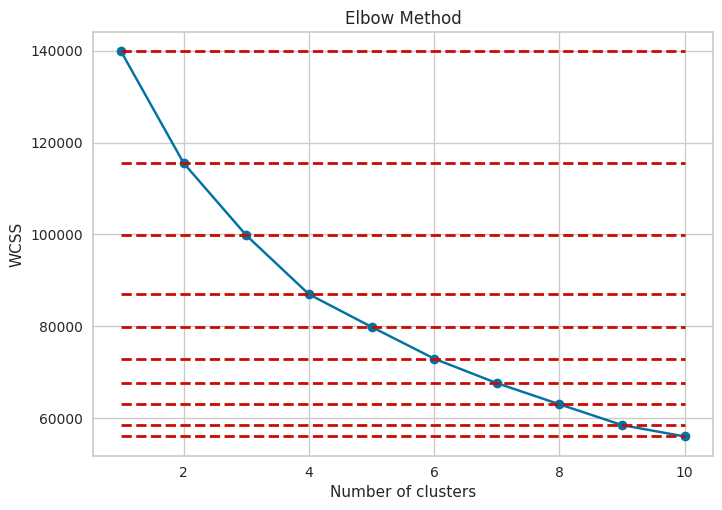

PCA  11


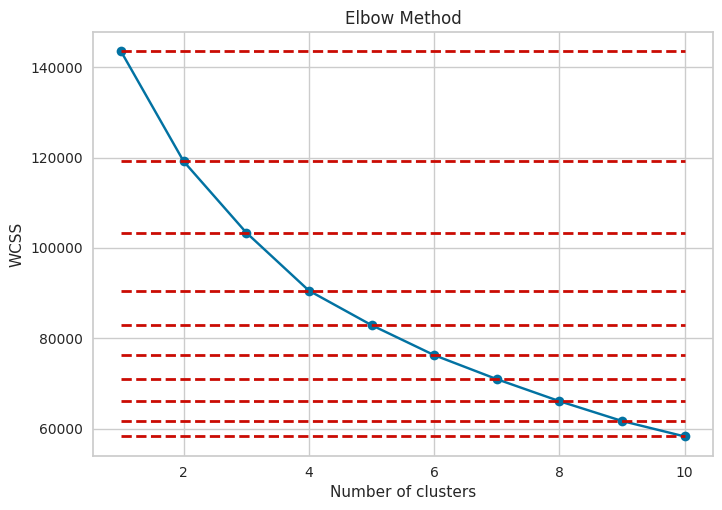

PCA  12


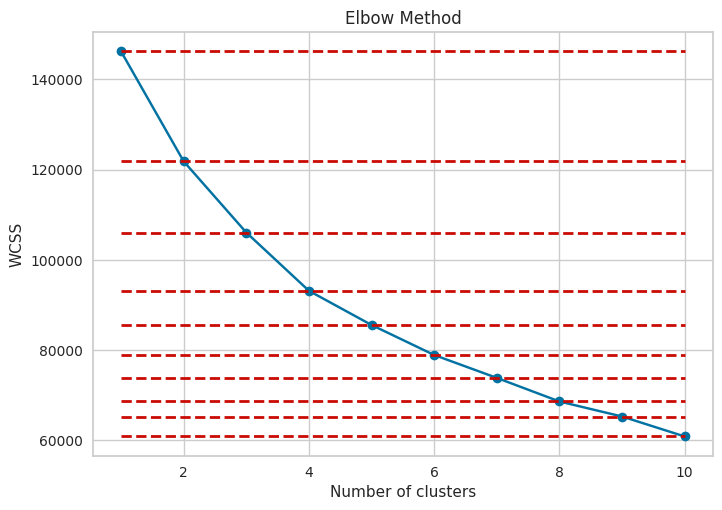

PCA  13


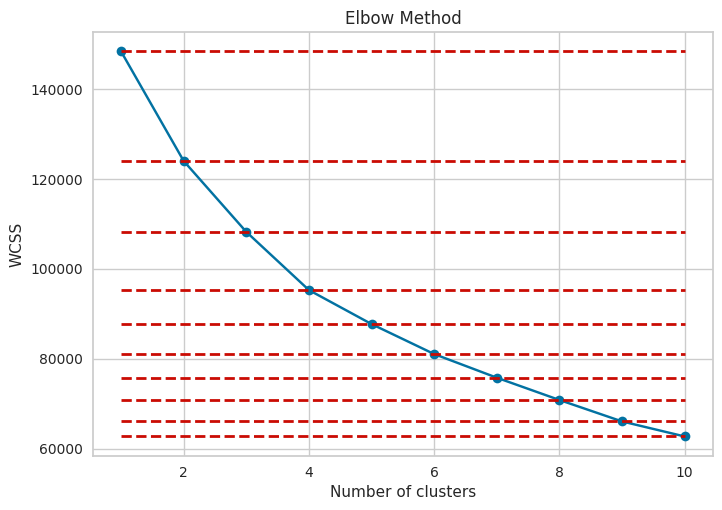

PCA  14


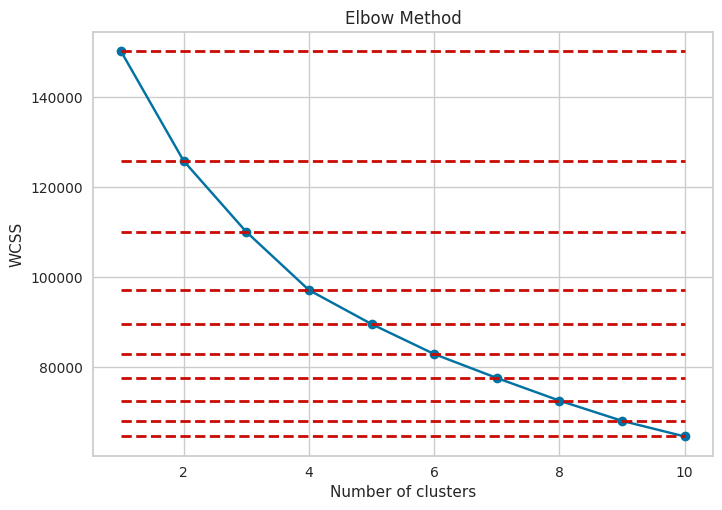

PCA  15


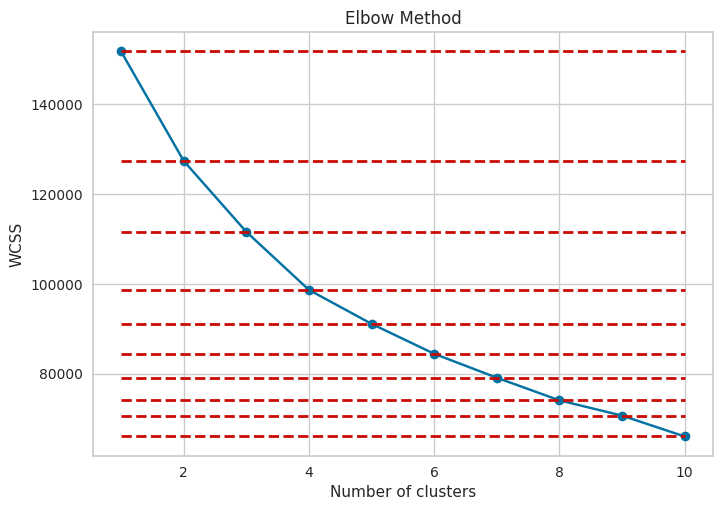

PCA  16


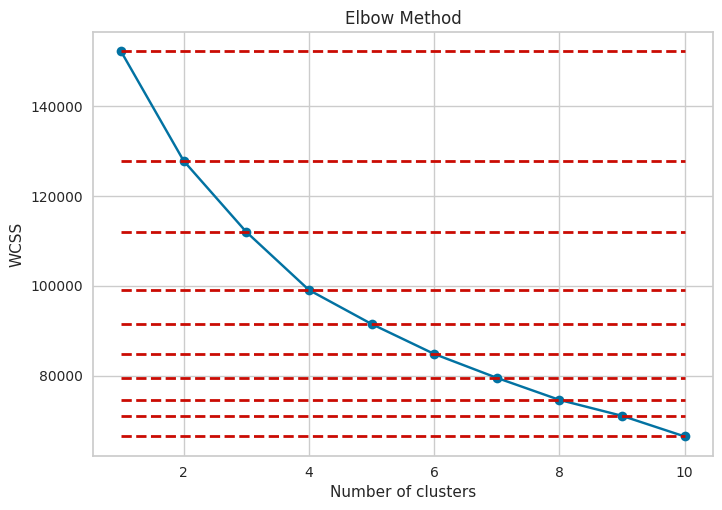

PCA  17


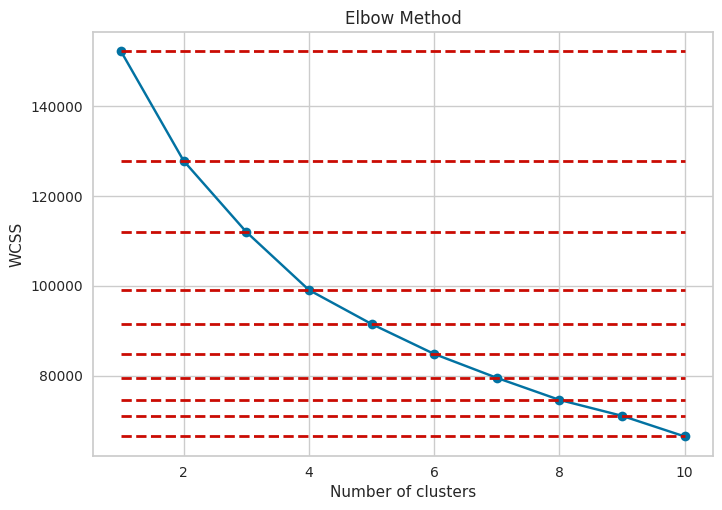

=================original==================


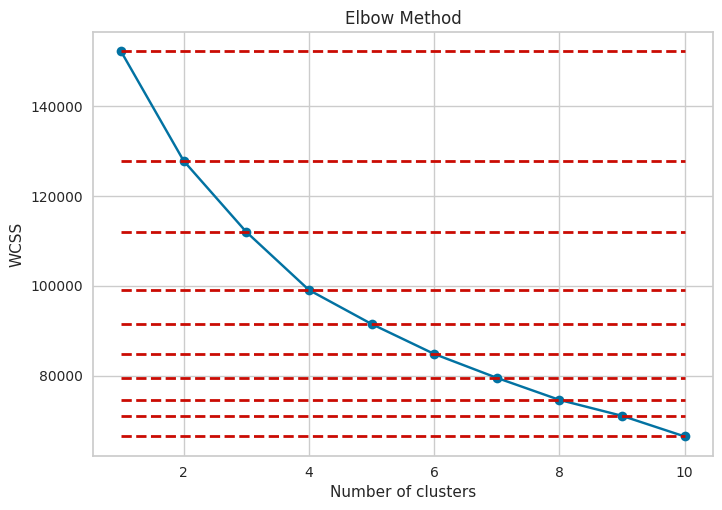

In [165]:
for i in range(len(data.columns)):
    pca = PCA(n_components = i+1)
    df_pca_i = pca.fit_transform(data)
    df_pca_i = pd.DataFrame(df_pca_i)
    print("PCA ", i+1)
    plot_elbow_method(df_pca_i)
print("=================original==================")
plot_elbow_method(data)

In [166]:
# it seems that 4 or 5 is good number for clusters. because adding clusters doesn't decrease
# WCSS much in this regions (but reducing clusters increases WCSS very much)

Use the `KMeans` class from the `sklearn.cluster` module to create clusters from the DataFrame that has been dimensionally reduced using `PCA`. **(P3-1-3: 3 points)**

Follow [this link](https://www.youtube.com/watch?v=R2e3Ls9H_fc) to understand more about KMeans (4 minutes).

In [167]:
num_clusters = 4

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

kmeans.fit(pca_df)

pca_df['Cluster'] = kmeans.labels_
pca_df.head(10)

# plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', edgecolors='k', s=50)
# plt.title('KMeans Clustering in PCA Space')
# plt.xlabel('Principal Component 1 (PC1)')
# plt.ylabel('Principal Component 2 (PC2)')
# plt.show()

,PC1,PC2,PC3,PC4,Cluster
0,-1.683649,-1.072241,0.475658,0.679828,3
1,-1.134084,2.509148,0.602226,-0.109116,1
2,0.969395,-0.383576,0.090967,1.238257,0
3,-0.888220,0.004648,1.499803,1.075373,3
4,-1.600021,-0.683794,0.347922,1.013428,3
5,0.252961,-0.776378,-1.149599,0.814914,0
6,6.350169,-0.704561,2.090425,-0.766888,2
7,0.276080,-1.288145,-1.830087,0.186018,0
8,-0.442170,-0.459496,0.178101,1.031098,3
9,-0.563829,-0.366721,1.943201,0.993651,3


Complete the definition of the following class to implement PCA, which is capable of reducing the dimensionality. **(P3-1-4: 10 points)**

In [168]:
class CustomPCA:
    """
    Custom implementation of PCA.
    Attributes:
    -----------
    n_components : int
        Number of principal components.
    components : ndarray
        Principal components.
    """
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None

    def fit(self, X):
        """
        Fit the model with X.
        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            Training data.
        """
        cov_matrix = np.cov(X.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        idx = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, idx]
        self.components = eigenvectors[:, :self.n_components]
        

    def transform(self, X):
        """
        Apply dimensionality reduction to X.
        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            Data to transform.
        Returns:
        --------
        X_transformed : ndarray, shape (n_samples, n_components)
            Transformed data.
        """
        return X.dot(self.components)        

Complete defining the class below to implement `KMeans`, an algorithm designed for clustering. **(P3-1-5: 15 points)**

In [169]:
import numpy as np

class CustomKMeans:
    """
    Custom implementation of K-means clustering.
    Attributes:
    -----------
    n_clusters : int
        Number of clusters.
    centroids : ndarray
        Coordinates of cluster centers.
    """
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.centroids = None

    def fit_predict(self, X, max_iters=100):
        """
        Compute k-means clustering.
        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            Training instances to cluster.
        max_iters : int, optional (default=100)
            Maximum number of iterations.
        Returns:
        --------
        labels : ndarray, shape (n_samples,)
            Index of the cluster each sample belongs to.
        """
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(max_iters):
            labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1)
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])

            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        return labels


## Sec 2: Fitting implemented Kmeans **(P3-Sec2: 5 Points)**

Use your implemented `CustomPCA` to reduce the dimensionality of the DataFrame. **(P3-2-1: 3 points)**

In [175]:
custom_pca = CustomPCA(n_components=4)


numeric_columns = data.select_dtypes(include='number')
custom_pca.fit(numeric_columns.to_numpy())
pca_result = custom_pca.transform(numeric_columns.to_numpy())

costum_pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(custom_pca.n_components)])
costum_pca_df

,PC1,PC2,PC3,PC4
0,-1.683649,-1.072241,0.475660,-0.679928
1,-1.134085,2.509150,0.602216,0.109542
2,0.969395,-0.383577,0.090970,-1.238359
3,-0.888220,0.004648,1.499800,-1.075271
4,-1.600021,-0.683795,0.347927,-1.013642
...,...,...,...,...
8945,-0.362572,-2.013437,-0.975609,2.742418
8946,-0.580810,-1.675663,-1.222354,1.980537
8947,-0.928985,-1.808048,-0.458242,2.296301
8948,-2.337845,-0.653611,0.982831,1.847692


Apply the `CustomKMeans` implementation you created to perform clustering on the DataFrame. **(P3-2-2: 2 points)**

In [176]:
custom_kmeans = CustomKMeans(n_clusters=4)

cluster_labels = custom_kmeans.fit_predict(pca_result)
costum_pca_df['Cluster'] = cluster_labels
costum_pca_df

,PC1,PC2,PC3,PC4,Cluster
0,-1.683649,-1.072241,0.475660,-0.679928,0
1,-1.134085,2.509150,0.602216,0.109542,2
2,0.969395,-0.383577,0.090970,-1.238359,1
3,-0.888220,0.004648,1.499800,-1.075271,0
4,-1.600021,-0.683795,0.347927,-1.013642,0
...,...,...,...,...,...
8945,-0.362572,-2.013437,-0.975609,2.742418,1
8946,-0.580810,-1.675663,-1.222354,1.980537,1
8947,-0.928985,-1.808048,-0.458242,2.296301,1
8948,-2.337845,-0.653611,0.982831,1.847692,0


# Phase 4: Analyzing

## Sec 1: Visualizing and Comparing **(P4-Sec1: 5 Points)**

Visualize and compare the clustering results from the sklearn library with those from your custom clustering implementation. **(P4-1-1: 5 points)**

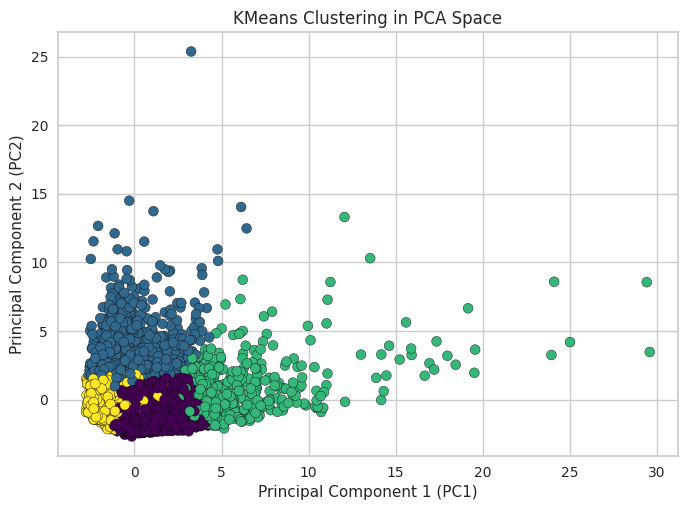

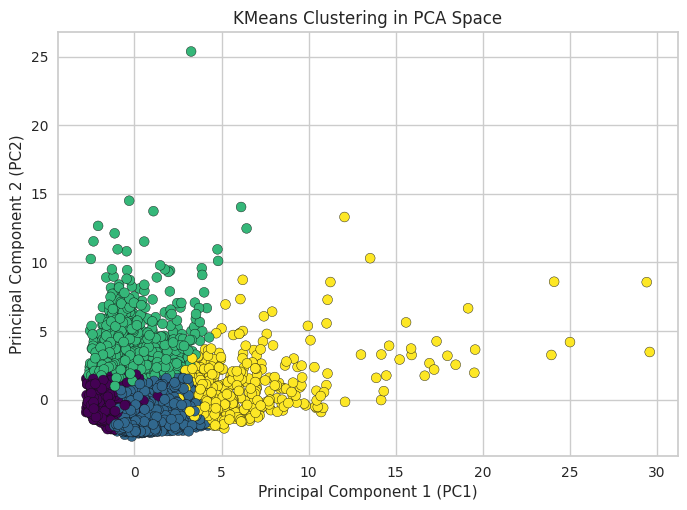

In [177]:
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', edgecolors='k', s=50)
plt.title('KMeans Clustering in PCA Space')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
x_limits, y_limits = plt.xlim(), plt.ylim()
plt.show()


plt.scatter(costum_pca_df['PC1'], costum_pca_df['PC2'], c=costum_pca_df['Cluster'], cmap='viridis', edgecolors='k', s=50)
plt.title('KMeans Clustering in PCA Space')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
# plt.xlim(x_limits)
# plt.ylim(y_limits)
plt.show()


## Sec 2: Silhouette Analysis **(P4-Sec2: 10 Points)**

**Silhouette Analysis** involves calculating and plotting the silhouette coefficients, which measure how similar each point is to its own cluster compared to other clusters. The closer these coefficients are to +1, the better the clustering.

Calculate the silhouette scores for each sample in the dataset using `silhouette_samples` and the average silhouette score using `silhouette_score`. Then, visualize these scores in a plot for each cluster for both results from the sklearn library and those from your custom clustering implementation.  **(P4-2-1: 10 points)**

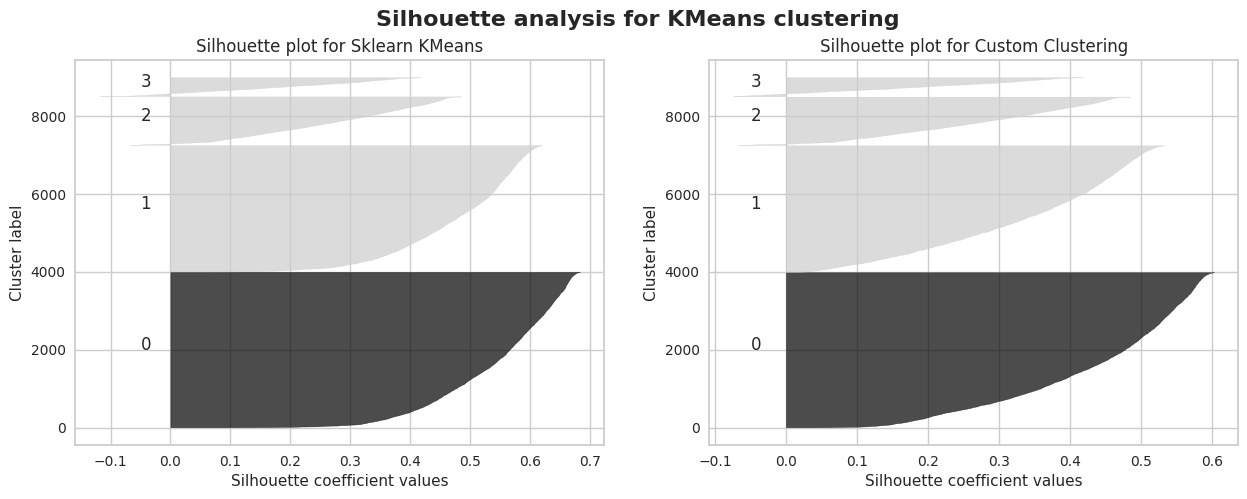

In [179]:
sklearn_silhouette_values = silhouette_samples(pca_df, pca_df['Cluster'])
sklearn_avg_silhouette = silhouette_score(pca_df, pca_df['Cluster'])

custom_silhouette_values = silhouette_samples(costum_pca_df, costum_pca_df['Cluster'])
custom_avg_silhouette = silhouette_score(costum_pca_df, costum_pca_df['Cluster'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Silhouette analysis for KMeans clustering', fontsize=16, fontweight='bold')

y_lower = 10
for i in range(4):
    ith_cluster_silhouette_values = sklearn_silhouette_values[pca_df['Cluster'] == (i-1)%4]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / sklearn_avg_silhouette)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("Silhouette plot for Sklearn KMeans")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

y_lower = 10
for i in range(4):
    ith_cluster_silhouette_values = custom_silhouette_values[costum_pca_df['Cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / custom_avg_silhouette)
    ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax2.set_title("Silhouette plot for Custom Clustering")
ax2.set_xlabel("Silhouette coefficient values")
ax2.set_ylabel("Cluster label")

plt.show()